### How To Handle Categorical Missing Values

#### Frequent Category Imputation

In [7]:
df.columns

Index(['Survived', 'Age', 'Fare', 'Age_zero', 'Age_hundred'], dtype='object')

In [8]:
df=pd.read_csv('house.csv')

In [9]:
df.shape

(1460, 81)

In [10]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
df.isnull().mean().sort_values(ascending=True)

Id               0.000000
TotalBsmtSF      0.000000
Heating          0.000000
SaleCondition    0.000000
CentralAir       0.000000
                   ...   
FireplaceQu      0.472603
Fence            0.807534
Alley            0.937671
MiscFeature      0.963014
PoolQC           0.995205
Length: 81, dtype: float64

### Compute the frequency with every feature

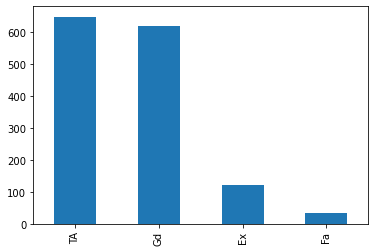

In [12]:
df['BsmtQual'].value_counts().plot.bar()

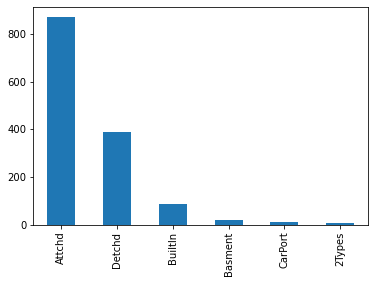

In [13]:
df['GarageType'].value_counts().plot.bar()

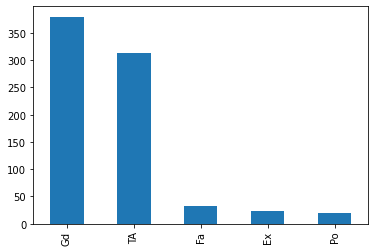

In [14]:
df['FireplaceQu'].value_counts().plot.bar()

In [15]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [16]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [17]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [18]:
df.isnull().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

#### Advantages
1. Easy To implement
2. Fater way to implement
#### Disadvantages
1. Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
2. It distorts the relation of the most frequent label

##### Adding a variable to capture NAN

In [19]:
df=pd.read_csv('house.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd         NaN     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

In [20]:
import numpy as np
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [21]:
df.head()

BsmtQual FireplaceQu GarageType  SalePrice  BsmtQual_Var
0       Gd         NaN     Attchd     208500             0
1       Gd          TA     Attchd     181500             0
2       Gd          TA     Attchd     223500             0
3       TA          Gd     Detchd     140000             0
4       Gd          TA     Attchd     250000             0

In [22]:
frequent = df['BsmtQual'].value_counts().index[0]

In [23]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [24]:
df

BsmtQual FireplaceQu GarageType  SalePrice  BsmtQual_Var
0          Gd         NaN     Attchd     208500             0
1          Gd          TA     Attchd     181500             0
2          Gd          TA     Attchd     223500             0
3          TA          Gd     Detchd     140000             0
4          Gd          TA     Attchd     250000             0
...       ...         ...        ...        ...           ...
1455       Gd          TA     Attchd     175000             0
1456       Gd          TA     Attchd     210000             0
1457       TA          Gd     Attchd     266500             0
1458       TA         NaN     Attchd     142125             0
1459       TA         NaN     Attchd     147500             0

[1460 rows x 5 columns]

In [25]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].value_counts().index[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [26]:
df.head()

BsmtQual FireplaceQu GarageType  SalePrice  BsmtQual_Var  FireplaceQu_Var
0       Gd          Gd     Attchd     208500             0                1
1       Gd          TA     Attchd     181500             0                0
2       Gd          TA     Attchd     223500             0                0
3       TA          Gd     Detchd     140000             0                0
4       Gd          TA     Attchd     250000             0                0

#### Suppose if you have more frequent categories, we just replace NAN with a new category

In [27]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [28]:
df.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd         NaN     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

In [29]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [30]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [31]:
df.head()

BsmtQual FireplaceQu GarageType  SalePrice BsmtQualnewvar FireplaceQunewvar  \
0       Gd         NaN     Attchd     208500             Gd           Missing   
1       Gd          TA     Attchd     181500             Gd                TA   
2       Gd          TA     Attchd     223500             Gd                TA   
3       TA          Gd     Detchd     140000             TA                Gd   
4       Gd          TA     Attchd     250000             Gd                TA   

  GarageTypenewvar  
0           Attchd  
1           Attchd  
2           Attchd  
3           Detchd  
4           Attchd

In [32]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [33]:
df.head()

SalePrice BsmtQualnewvar FireplaceQunewvar GarageTypenewvar
0     208500             Gd           Missing           Attchd
1     181500             Gd                TA           Attchd
2     223500             Gd                TA           Attchd
3     140000             TA                Gd           Detchd
4     250000             Gd                TA           Attchd